# **Zomato Data Analysis Project**

## 1. Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

In [2]:
df=pd.read_csv('/content/Zomato data .csv')

In [3]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## 3. Data Cleaning and Pre-processing

### Converting data type of column name- rate

In [4]:
#creating an user defined function
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
# identifying missing values
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


### Question 1)Type of restaurant majority of customers order from?

Text(0.5, 0, 'Type of restaurant')

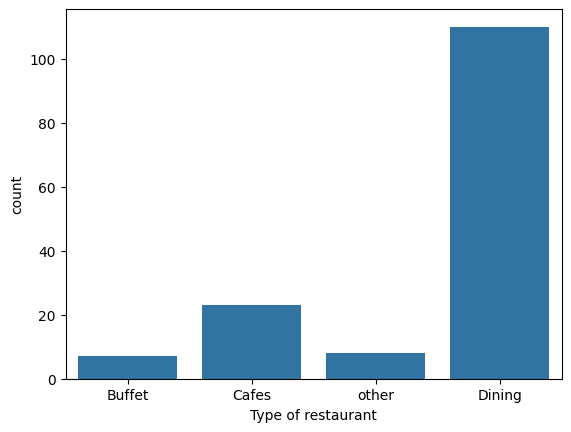

In [7]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of restaurant')

### According to the countplot majority of restaurant customers order from is **Dining**.

### Question 2) How many votes has each type of restaurant received from customers?

In [8]:
groupdata=df.groupby('listed_in(type)')['votes'].sum()
groupdata

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

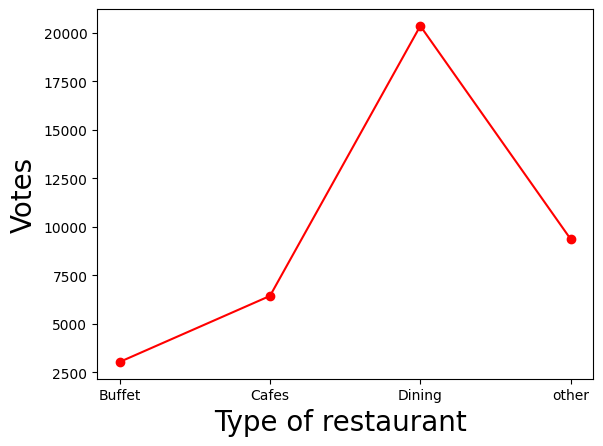

In [9]:
result=pd.DataFrame({'votes':groupdata})
plt.plot(result,c='red',marker='o')
plt.xlabel('Type of restaurant ',size=20)
plt.ylabel('Votes',size=20)

### According to the Line Plot, **Dining** has recieved maximum votes

### Question 3) What are ratings that majority of restaurants have received?

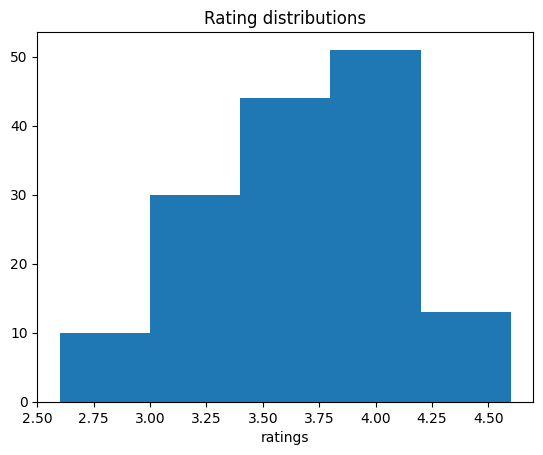

In [10]:
plt.hist(df['rate'],bins=5)
plt.xlabel('ratings')
plt.title('Rating distributions')
plt.show()

### Majority of ratings received are between **3.5 to 4**



### Question 4) Zomato has observed most couple order food online. Find Average spending of couples on each order?



<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

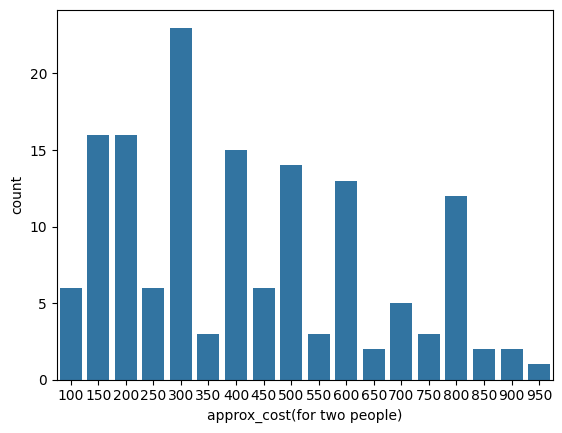

In [11]:
sns.countplot(x=df['approx_cost(for two people)'])


### Majority of couples prefer restaurants with approximate cost of **300 Rupees**.

### Question 5) Which mode(online or offline) has received maximum rating?

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Ratings')

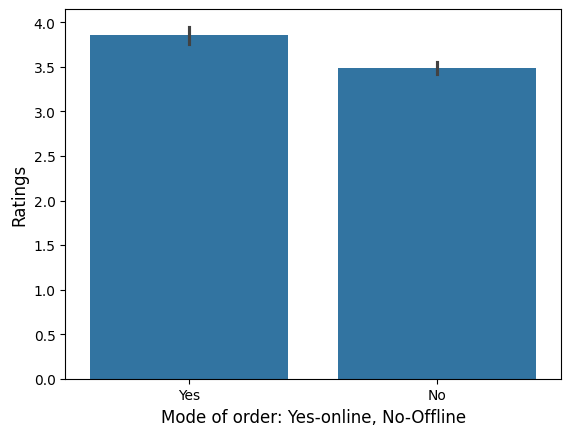

In [13]:
sns.barplot(x=df['online_order'],y=df['rate'])
plt.xlabel('Mode of order: Yes-online, No-Offline',size=12)
plt.ylabel('Ratings', size=12)

### The order_online column has 2 entries Yes indicates it is an online order and No indicates it's an offline order. According to the bar plot **Online Orders have maximum rating**.

### Question 6) Which type of restaurant receives more offline orders so that zomato can provide customers with some good offers?

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


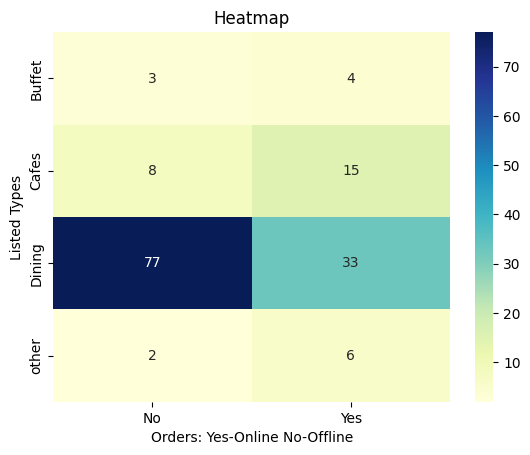

In [20]:
pivottable=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivottable,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Orders: Yes-Online No-Offline')
plt.ylabel('Listed Types')
plt.show()

### **Dining restaurants** observes more offline orders , whereas cafes primarily receives online orders. This suggests that customers prefer orders in person at restaurants, but prefer online ordering at cafes